Analysis of 2020 PA Congressional Spending: Individual Donations vs. PAC Donations -- Step 2. Analyze Data

In [70]:
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

df = pd.read_csv('insert csv path here')

del df['id']
df = df[(df['total']>0) & ((df['party']=='REP') | (df['party']=='DEM'))] #filter out libertarians, independents
df['%_pac'] = round(100*(df.pac / df.total), 2)
df['%>45']=df['%_pac'] > 45
print(df)


                       name party  district    total      pac win  %_pac   %>45
1        FINELLO, CHRISTINA   DEM         1  2342577   247143   L  10.55  False
2        FITZPATRICK, BRIAN   REP         1  3678876  1807531   W  49.13   True
4          BOYLE, BRENDAN F   DEM         2  1529016  1123519   W  73.48   True
5             EVANS, DWIGHT   DEM         3   943879   663355   W  70.28   True
7           DEAN, MADELEINE   DEM         4  1569658   782491   W  49.85   True
8           BARNETTE, KATHY   REP         4   970886    39005   L   4.02  False
10        SCANLON, MARY GAY   DEM         5  1456213   379001   W  26.03  False
11            PRUETT, DASHA   REP         5   105145     5250   L   4.99  False
12        HOULAHAN, CHRISSY   DEM         6  3140100  1020062   W  32.49  False
14         EMMONS, JOHN MR.   REP         6   418512    21500   L   5.14  False
15              WILD, SUSAN   DEM         7  4460538  1027681   W  23.04  False
16           SCHELLER, LISA   REP       

How many Democrats ran, how many Republicans ran?

In [71]:
print('#dems: ', len(df[df['party']=='DEM']), '#reps: ', len(df[df['party']=='REP']))

#dems:  17 #reps:  17


Total, PAC, %PAC Spending By Party

In [72]:
df2 = df.groupby(['party'], as_index = False).agg({'total':'sum','pac':'sum'}) #sum total, pac contributions by party
df2['%_pac'] = round(100*(df2.pac / df2.total), 2)
print(df2)

  party     total      pac  %_pac
0   DEM  29274270  8652392  29.56
1   REP  26036690  8745362  33.59


Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2f720c280>]],
      dtype=object)

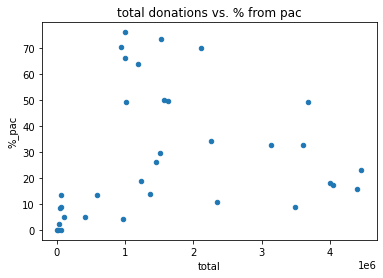

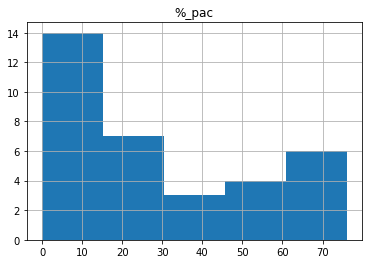

In [73]:
df.plot.scatter(x = 'total', y = '%_pac', title='total donations vs. % from pac')
df.hist(column='%_pac', bins=5)

Does more PAC funding win elections?

In [74]:
df3=df[df['%>45']]
print(df3)

                   name party  district    total      pac win  %_pac  %>45
2    FITZPATRICK, BRIAN   REP         1  3678876  1807531   W  49.13  True
4      BOYLE, BRENDAN F   DEM         2  1529016  1123519   W  73.48  True
5         EVANS, DWIGHT   DEM         3   943879   663355   W  70.28  True
7       DEAN, MADELEINE   DEM         4  1569658   782491   W  49.85  True
20       MEUSER, DANIEL   REP         9  1018286   500103   W  49.11  True
25    SMUCKER, LLOYD K.   REP        11  1184219   757550   W  63.97  True
29          JOYCE, JOHN   REP        13   992792   657350   W  66.21  True
34  THOMPSON, GLENN MR.   REP        15  1624262   806080   W  49.63  True
37   KELLY, GEORGE J JR   REP        16  2109606  1472701   W  69.81  True
42       DOYLE, MICHAEL   DEM        18   999655   759750   W  76.00  True


All candidates with PAC donations greater than 45% of total donations won.

Number of Democrats, Republicans with PAC donations greater than 45% 

In [76]:
print(df3.groupby(['party']).agg({'win':'count'}))

       win
party     
DEM      4
REP      6
